In [63]:
import numpy as np
from fun_doe import get_model_matrix
import pandas as pd
import plotly.express as px

In [112]:
X = pd.DataFrame(np.linspace(-1, 1, 50), columns=['x1'])
XX = get_model_matrix(data=X, order=3, bias=True)

In [117]:
XX

,1,x1,x1^2,x1^3
0,1.0,-1.000000,1.000000,-1.000000
1,1.0,-0.959184,0.920033,-0.882481
2,1.0,-0.918367,0.843399,-0.774550
3,1.0,-0.877551,0.770096,-0.675798
4,1.0,-0.836735,0.700125,-0.585819
5,1.0,-0.795918,0.633486,-0.504203
6,1.0,-0.755102,0.570179,-0.430543
7,1.0,-0.714286,0.510204,-0.364431
8,1.0,-0.673469,0.453561,-0.305459
9,1.0,-0.632653,0.400250,-0.253219


In [118]:
w = pd.DataFrame([3, 1 ,0.9, 1], index=XX.columns)

<AxesSubplot:>

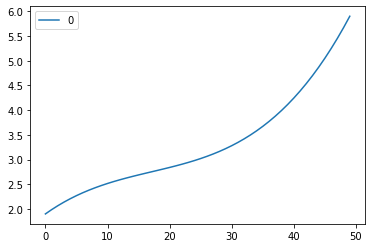

In [119]:
(XX @ w).plot()

In [161]:
import sympy as smp

In [166]:
t, T = smp.symbols('t, T')

### Expression

In [244]:
c_t = t**0 + t**1 + t**2
b_t = t**0 + t**1
step = smp.Piecewise((1, t < 0.3), (2, t < 0.5), (0, True))

In [245]:
scaling = smp.integrate(c_t*b_t, (t, 0, T)).subs(T, 1)

In [246]:
J_gcb = np.array([
    [1,-1, 1],
    [1,-1, 1],
    [-1,-1, 1],
    [1,-1, 1],
    [1,0, 1],
])
Z = np.matrix(np.append(np.ones((J_gcb.shape[0],1)), J_gcb * scaling, axis=1), dtype=float)

In [247]:
np.linalg.det(Z.T @ Z)

-4.4993051636947895e-12

In [252]:
smp.integrate(c_t*b_t, (t, 0, T)).subs(T,1)
print()

35/12